# Datamining
## Assignment 1 - Exercise 4
<br></br>
<font size="4">


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from datetime import datetime as dt

## A.

In [2]:
#Select date: 1/11/2020
df = pd.read_csv('owid-covid-data.csv')

df1 = df.loc[df['date'] == "2020-11-01"]

Choose only the columns that interest us.

In [3]:
df1['death_rate'] = df1['total_deaths']/df1['total_cases']
df1 = df1[['continent','location','total_cases_per_million', 'total_deaths_per_million','gdp_per_capita','hospital_beds_per_thousand','population_density','death_rate']]
df1

<ipython-input-3-ee51817f8ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['death_rate'] = df1['total_deaths']/df1['total_cases']


,continent,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,hospital_beds_per_thousand,population_density,death_rate
228,North America,Aruba,42270.011,355.919,35973.781,NaN,584.800,0.008420
561,Asia,Afghanistan,1066.087,39.457,1803.987,0.500,54.422,0.037011
812,Africa,Angola,321.241,8.489,5819.495,NaN,23.890,0.026425
1058,North America,Anguilla,199.973,NaN,NaN,NaN,NaN,NaN
1322,Europe,Albania,7253.805,176.871,11803.431,2.890,104.871,0.024383
...,...,...,...,...,...,...,...,...
58360,Africa,South Africa,12231.799,325.011,12294.876,2.320,46.754,0.026571
58614,Africa,Zambia,893.823,18.984,3689.251,2.000,22.995,0.021239
58866,Africa,Zimbabwe,562.608,16.282,1899.775,1.700,42.729,0.028940
59199,NaN,World,5925.053,153.511,15469.207,2.705,58.045,0.025909


## Γραφικές παραστάσεις

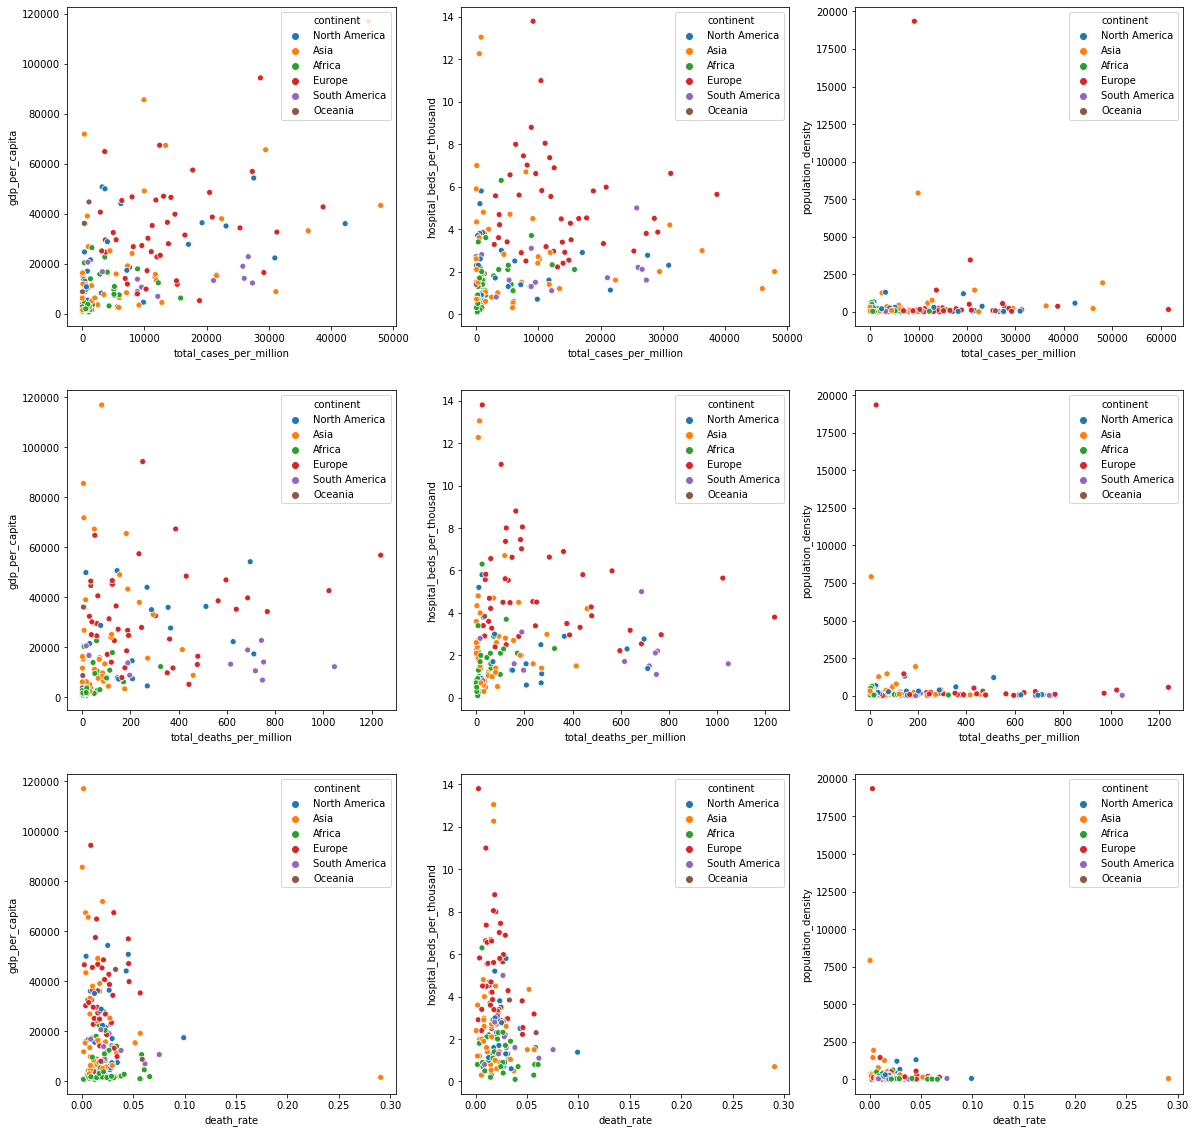

In [4]:
index = ['total_cases_per_million','total_deaths_per_million','death_rate']
characteristics = ['gdp_per_capita','hospital_beds_per_thousand','population_density']

f, axes = plt.subplots(3, 3)
f.set_figheight(20)
f.set_figwidth(20)

for i in range(len(index)):
    for j in range(len(characteristics)):
        sns.scatterplot(x=index[i],y=characteristics[j],hue='continent', data = df1,ax = axes[i,j])

## Υπολογισμός Pearson's r και p-value

In [5]:
for i in range(len(index)):
    for j in range(len(characteristics)):
        x = np.copy(df1[index[i]].to_numpy())
        y = np.copy(df1[characteristics[j]].to_numpy())
        for k in range(x.size):
            if np.isnan(x[k]) or np.isnan(y[k]):
                x[k] = np.nan
                y[k] = np.nan
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        print(index[i]+" - "+characteristics[j]+"\n"+"pearson corr coeff: "+ str(sp.stats.pearsonr(x,y)[0])+" p-value: "+str(sp.stats.pearsonr(x,y)[1]))
        print("----------------------")

total_cases_per_million - gdp_per_capita
pearson corr coeff: 0.5161674137125748 p-value: 5.4834890805132905e-14
----------------------
total_cases_per_million - hospital_beds_per_thousand
pearson corr coeff: 0.14231164955768844 p-value: 0.0665638349197008
----------------------
total_cases_per_million - population_density
pearson corr coeff: 0.06209344109855306 p-value: 0.3812032447080099
----------------------
total_deaths_per_million - gdp_per_capita
pearson corr coeff: 0.2541814747042481 p-value: 0.0007943788895214882
----------------------
total_deaths_per_million - hospital_beds_per_thousand
pearson corr coeff: 0.058641119429914956 p-value: 0.4715114112306964
----------------------
total_deaths_per_million - population_density
pearson corr coeff: -0.05839837242676396 p-value: 0.43230360356170316
----------------------
death_rate - gdp_per_capita
pearson corr coeff: -0.14995767683674233 p-value: 0.050270829872011716
----------------------
death_rate - hospital_beds_per_thousand
pea

<font size=3>
Όπως βλέπουμε από τα παραπάνω αποτελέσματα οι συσχετίσεις που είναι στατιστικά σημαντικές (p-value < 0.05) είναι:                                                                                                         
<li> total cases per million - gdp per capita
<li> total deaths per million - gdp per capita
<li> death rate - gdp per capita
<li> death rate - hospilat beds per thousand
<br>
<br>
Παρατηρούμε ότι στις συχετίσεις που έχουμε το επιθυμιτό p-value, το correlation coefficient του Pearson δείχνει επίσης μία γραμμική συσχέτιση των ζευγαριών από δεδομένα η οποία είναι είτε μικρότερη από -0.1 και δηλαδή τείνει προς αρνητική γραμμική συσχέτιση είτε μεγαλύτερη από 0.1 που σημαίνει πως τείνει προς θετική γραμμική συσχέτιση. Στις γραφικές παραστάσεις των ζευγαριών εκείνων που παρατηρείται (οπτικά) μία κάθετη είτε μια οριζόντια γραμμή βλέπουμε πως το r του Pearson μας δίνει ένα αποτέλεσμα πολύ κοντά στο 0, κατί που σημαίνει πως δεν υπάρχει γραμμική συσχέτιση που είναι και το λογικό. Σαυτές τις περιπτώσεις και το p-value δίνει τιμές μεγαλύτερες από 0.1 κάτι που αποδεικνύει ουδεμία στατιστική σημασία.
<br>
<br>
Όσον αφορά συγκεκριμένα τις μετρήσεις και τα διαγράμματα που περιλαμβάνουν το population density παρατηρούμε ότι το Pearson's r τείνει προς το 0 (άρα δεν υπάρχει γραμμική συσχέτιση με χαρακτηριστικά που συγκρίνεται) και το p-value παίρνει τιμές μεγαλύτερες από 0.1 (άρα δεν υπάρχει στατιστική σημασία). Ακόμη και οπτικά όμως καταλαβαίνουμε ότι το population density δεν παίζει κάποιο ρόλο στην μεταβολή των υπόλοιπων χαρακτηριστικών αφού τα δεδομένα μας είναι σχεδόν συνευθειακά (σχηματίζουν γραμμές παράλληλες στον χ'χ). Ο λόγος είναι ότι οι περισσότερες τιμές του population density βρίσκονται εντός ενός μικρού πεδίου τιμών.
</font>                                       

## Εφαρμόζοντας λογαριθμική συνάρτηση στο population density

In [6]:
df1['log_population_density'] = np.log(df1['population_density'])
df1

,continent,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,hospital_beds_per_thousand,population_density,death_rate,log_population_density
228,North America,Aruba,42270.011,355.919,35973.781,NaN,584.800,0.008420,6.371270
561,Asia,Afghanistan,1066.087,39.457,1803.987,0.500,54.422,0.037011,3.996768
812,Africa,Angola,321.241,8.489,5819.495,NaN,23.890,0.026425,3.173460
1058,North America,Anguilla,199.973,NaN,NaN,NaN,NaN,NaN,NaN
1322,Europe,Albania,7253.805,176.871,11803.431,2.890,104.871,0.024383,4.652731
...,...,...,...,...,...,...,...,...,...
58360,Africa,South Africa,12231.799,325.011,12294.876,2.320,46.754,0.026571,3.844900
58614,Africa,Zambia,893.823,18.984,3689.251,2.000,22.995,0.021239,3.135277
58866,Africa,Zimbabwe,562.608,16.282,1899.775,1.700,42.729,0.028940,3.754878
59199,NaN,World,5925.053,153.511,15469.207,2.705,58.045,0.025909,4.061219


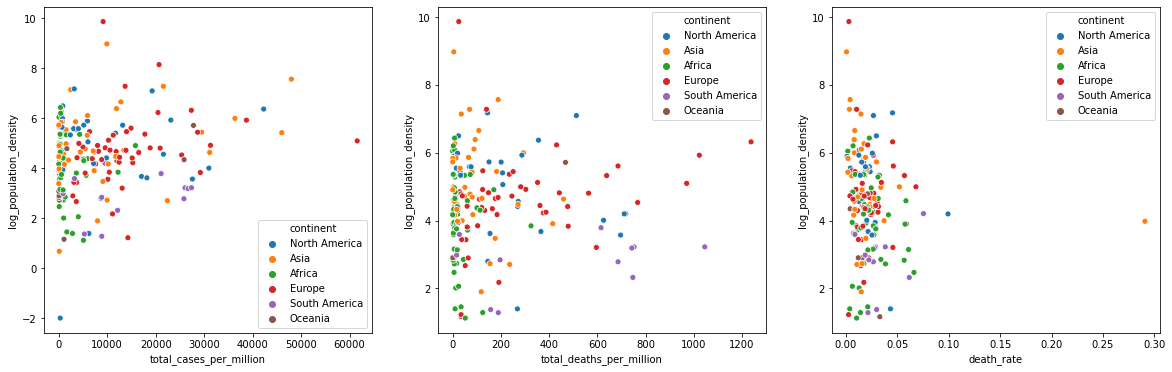

In [7]:
fig, axs = plt.subplots(ncols=3)
fig.set_figheight(6)
fig.set_figwidth(20)
for i in range(3):
    sns.scatterplot(data = df1, x=index[i], y='log_population_density',hue='continent',ax = axs[i])

In [8]:
for i in range(len(index)):
    x = np.copy(df1[index[i]].to_numpy())
    y = np.copy(df1['log_population_density'].to_numpy())
    for k in range(x.size):
        if np.isnan(x[k]) or np.isnan(y[k]):
            x[k] = np.nan
            y[k] = np.nan
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    print(index[i]+" - "+'log_population_density'+"\n"+"pearson corr coeff: "+ str(sp.stats.pearsonr(x,y)[0])+" p-value: "+str(sp.stats.pearsonr(x,y)[1]))
    print("----------------------")

total_cases_per_million - log_population_density
pearson corr coeff: 0.19789552584104625 p-value: 0.004861665847605274
----------------------
total_deaths_per_million - log_population_density
pearson corr coeff: 0.01160737622900275 p-value: 0.8760716534856704
----------------------
death_rate - log_population_density
pearson corr coeff: -0.13069125453030228 p-value: 0.07783046005243617
----------------------


<font size=3>
Παρατηρούμε ότι τώρα που λογαριθμήσαμε το population density το δεδομένα απλώθηκαν περισσότερο στις γραφικές παραστάσεις και πλέον έχουμε ένα ζευγάρι χαρακτηριστικών, το total cases per million - log(population density), που μας δίνει p-value < 0.05 και που το correlation coefficient είναι περίπου 0.2 δηλαδή έχουμε και γραμμική συσχέτιση (θετική) και στατιστική σημασία.
</font>

## Αφαιρώντας τις χώρες της Αφρικής

<font size=3>
Στις γραφικές παραστάσεις παρατηρούμε πως οι διάφορες τιμές που αφορούν αφρικανικές χώρες τείνουν να εμφανίζονται σε πολύ κοντινή απόσταση μεταξύ τους, όντας όπως μπορούμε να φανταστούμε χαμηλά σε μετρικές όπως gdp per capita και hospital beds per thousand.
</font>

In [9]:
df1.drop(df1.index[df1['continent'] == 'Africa'], inplace=True)
df1

,continent,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,hospital_beds_per_thousand,population_density,death_rate,log_population_density
228,North America,Aruba,42270.011,355.919,35973.781,NaN,584.800,0.008420,6.371270
561,Asia,Afghanistan,1066.087,39.457,1803.987,0.500,54.422,0.037011,3.996768
1058,North America,Anguilla,199.973,NaN,NaN,NaN,NaN,NaN,NaN
1322,Europe,Albania,7253.805,176.871,11803.431,2.890,104.871,0.024383,4.652731
1587,Europe,Andorra,61554.391,970.685,NaN,NaN,163.755,0.015770,5.098371
...,...,...,...,...,...,...,...,...,...
57574,Oceania,Wallis and Futuna,88.921,NaN,NaN,NaN,NaN,NaN,NaN
57833,Europe,Kosovo,10266.074,352.343,9795.834,NaN,168.155,0.034321,5.124886
58065,Asia,Yemen,69.168,20.117,1479.147,0.700,53.508,0.290839,3.979831
59199,NaN,World,5925.053,153.511,15469.207,2.705,58.045,0.025909,4.061219


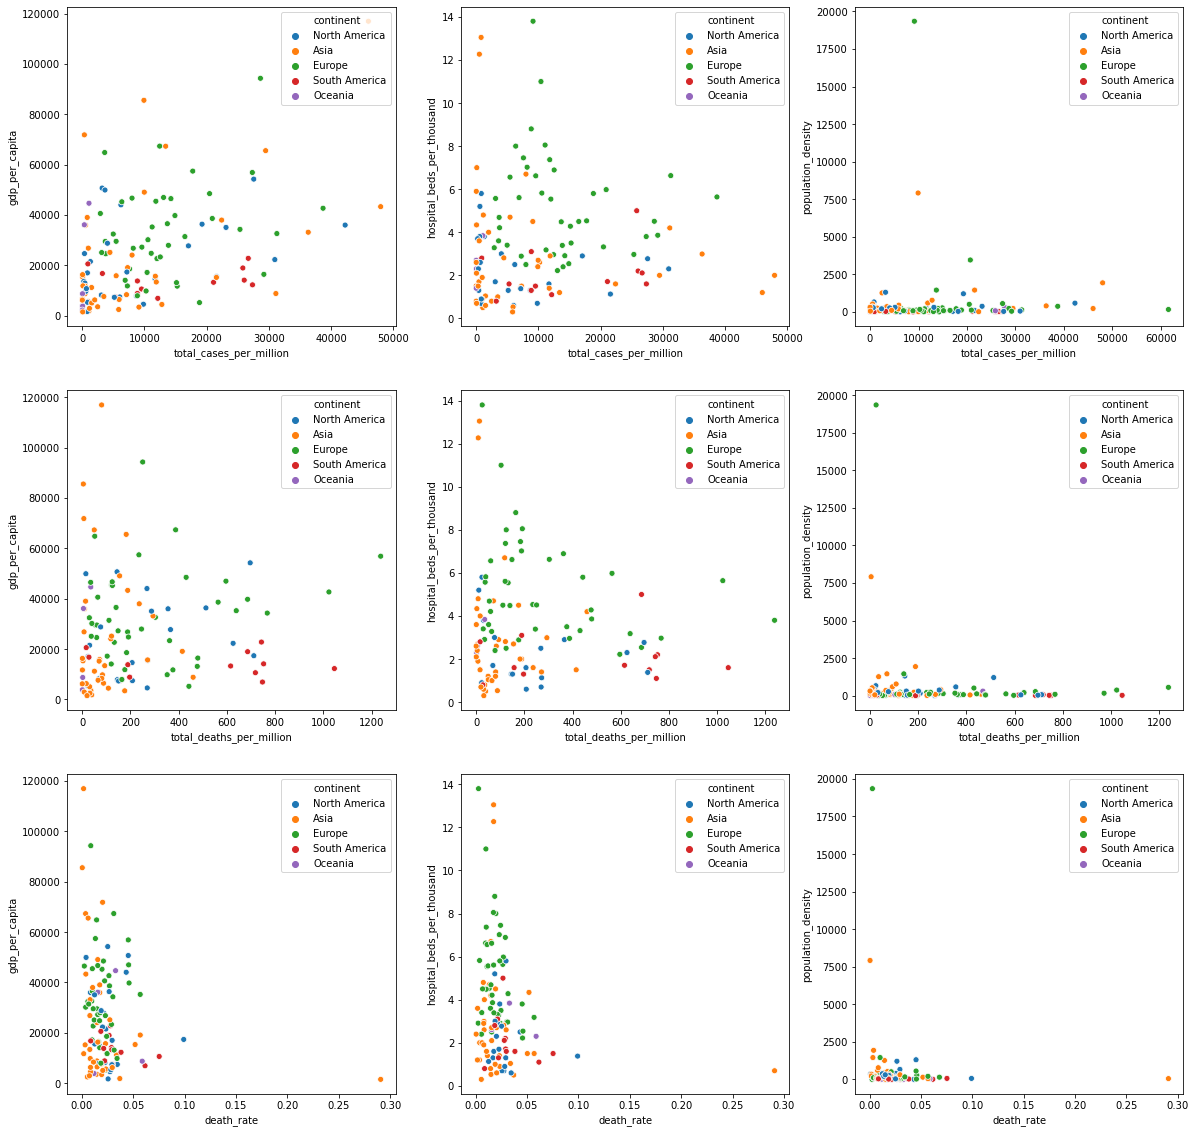

In [10]:
f, axes = plt.subplots(3, 3)
f.set_figheight(20)
f.set_figwidth(20)

for i in range(len(index)):
    for j in range(len(characteristics)):
        sns.scatterplot(x=index[i],y=characteristics[j],hue='continent', data = df1,ax = axes[i,j])

In [11]:
for i in range(len(index)):
    for j in range(len(characteristics)):
        x = np.copy(df1[index[i]].to_numpy())
        y = np.copy(df1[characteristics[j]].to_numpy())
        for k in range(x.size):
            if np.isnan(x[k]) or np.isnan(y[k]):
                x[k] = np.nan
                y[k] = np.nan
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        print(index[i]+" - "+characteristics[j]+"\n"+"pearson corr coeff: "+ str(sp.stats.pearsonr(x,y)[0])+" p-value: "+str(sp.stats.pearsonr(x,y)[1]))
        print("----------------------")

total_cases_per_million - gdp_per_capita
pearson corr coeff: 0.41743135422561184 p-value: 6.372855949574424e-07
----------------------
total_cases_per_million - hospital_beds_per_thousand
pearson corr coeff: 0.009509394071209279 p-value: 0.9154964762148712
----------------------
total_cases_per_million - population_density
pearson corr coeff: 0.0329037048170672 p-value: 0.6913642650506671
----------------------
total_deaths_per_million - gdp_per_capita
pearson corr coeff: 0.07912056668899134 p-value: 0.39034153580961256
----------------------
total_deaths_per_million - hospital_beds_per_thousand
pearson corr coeff: -0.084037884206039 p-value: 0.37188835758304883
----------------------
total_deaths_per_million - population_density
pearson corr coeff: -0.09893296138297854 p-value: 0.2590609055011316
----------------------
death_rate - gdp_per_capita
pearson corr coeff: -0.19250739957707053 p-value: 0.035162222649280865
----------------------
death_rate - hospital_beds_per_thousand
pearso

<font size=3>
Μια μεγάλη διαφορά που παρατηρείται στα αποτελέσματα μετά την αφαίρεση των αφρικανικών χωρών είναι πως η σχέση total deaths per million - gdp per capita πλέον δεν έχει ούτε στατιστική σημασία και ούτε γραμμική συσχέτιση. Το ίδιο ακριβώς ισχύει και για την σχέση total cases per million - hospital beds per thousand. Αυτό όπως εξηγήσαμε και πιο πάνω, οφείλεται στο γεγονός πως οι χώρες της Αφρικής σαυτές τις μετρικές είναι αρκετά χαμηλά δηλαδή σαν σημεία στην γραφική παράσταση έχουν μικρή απόσταση μεταξύ τους κάτι το οποίο και οπτικά συμβάλλει στην γραμμική συσχέτιση των δεδομένων.
</font>

## Μόνο χώρες της Ευρώπης

In [12]:
df1 = df1.loc[df1['continent'] == 'Europe']
df1

,continent,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,hospital_beds_per_thousand,population_density,death_rate,log_population_density
1322,Europe,Albania,7253.805,176.871,11803.431,2.890,104.871,0.024383,4.652731
1587,Europe,Andorra,61554.391,970.685,NaN,NaN,163.755,0.015770,5.098371
3440,Europe,Austria,11834.251,121.802,45436.686,7.370,106.749,0.010292,4.670480
4347,Europe,Belgium,38716.900,1022.985,42658.576,5.640,375.564,0.026422,5.928429
5634,Europe,Bulgaria,7605.155,184.070,18563.307,7.454,65.180,0.024203,4.177153
6484,Europe,Bosnia and Herzegovina,15267.548,376.126,11713.895,3.500,68.496,0.024636,4.226775
6817,Europe,Belarus,10422.125,103.711,17167.967,11.000,46.858,0.009951,3.847122
9856,Europe,Switzerland,17762.540,235.135,57410.166,4.530,214.243,0.013238,5.367111
13515,Europe,Cyprus,4984.593,29.684,32415.132,3.400,127.657,0.005955,4.849347
13848,Europe,Czech Republic,31291.676,303.577,32605.906,6.630,137.176,0.009702,4.921265


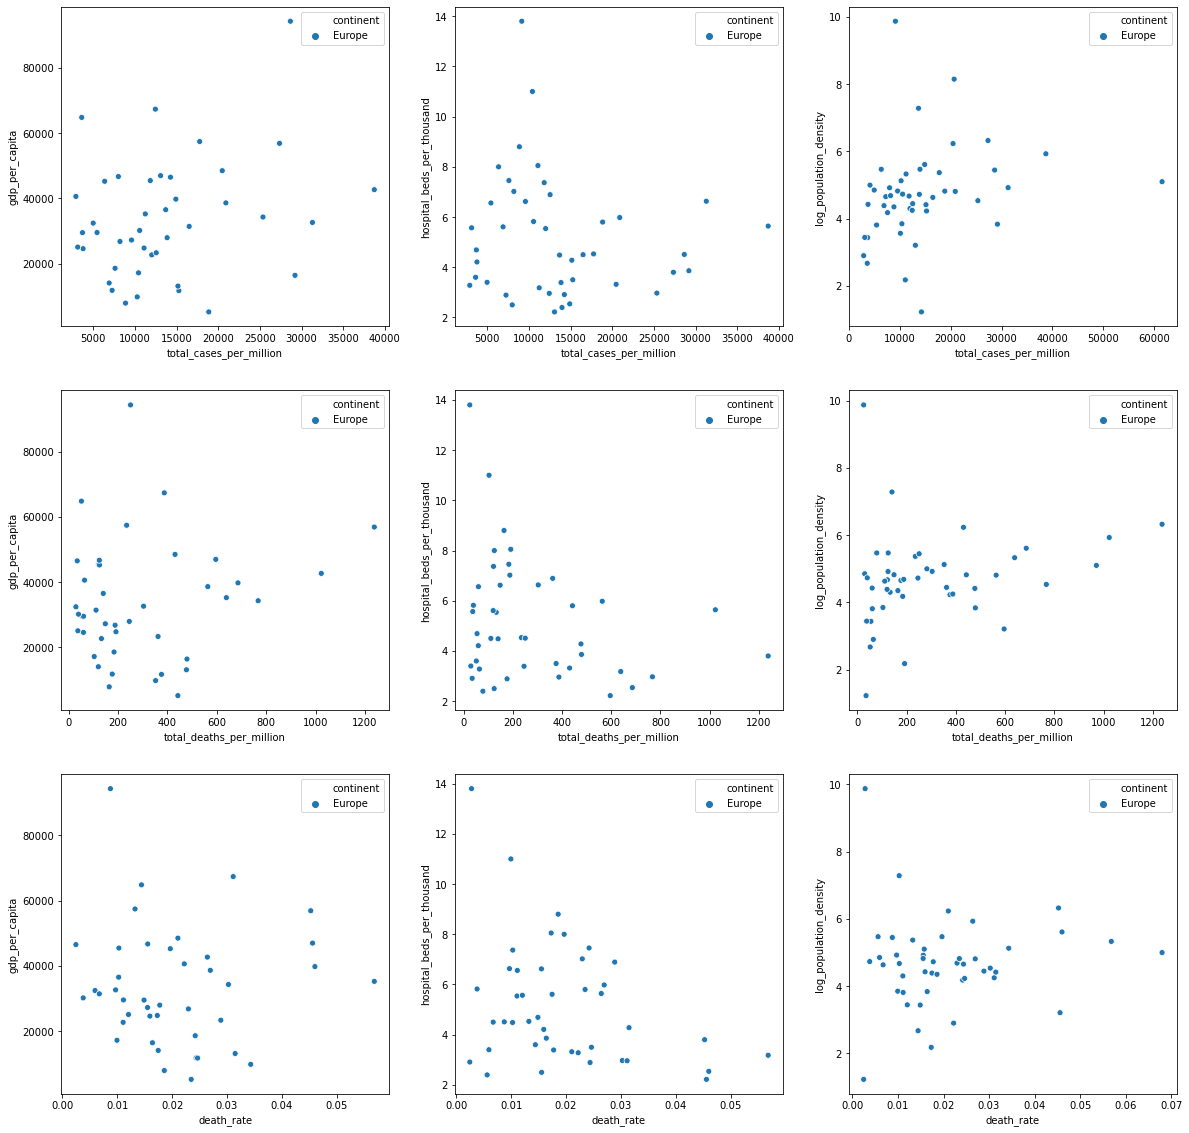

In [13]:
characteristics2 = ['gdp_per_capita','hospital_beds_per_thousand','log_population_density']
f, axes = plt.subplots(3, 3)
f.set_figheight(20)
f.set_figwidth(20)

for i in range(len(index)):
    for j in range(len(characteristics2)):
        sns.scatterplot(x=index[i],y=characteristics2[j],hue='continent', data = df1,ax = axes[i,j])

In [14]:
for i in range(len(index)):
    for j in range(len(characteristics2)):
        x = np.copy(df1[index[i]].to_numpy())
        y = np.copy(df1[characteristics2[j]].to_numpy())
        for k in range(x.size):
            if np.isnan(x[k]) or np.isnan(y[k]):
                x[k] = np.nan
                y[k] = np.nan
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        print(index[i]+" - "+characteristics2[j]+"\n"+"pearson corr coeff: "+ str(sp.stats.pearsonr(x,y)[0])+" p-value: "+str(sp.stats.pearsonr(x,y)[1]))
        print("----------------------")

total_cases_per_million - gdp_per_capita
pearson corr coeff: 0.2572352696768211 p-value: 0.1000582050506105
----------------------
total_cases_per_million - hospital_beds_per_thousand
pearson corr coeff: -0.13204345439990278 p-value: 0.3986375397148635
----------------------
total_cases_per_million - log_population_density
pearson corr coeff: 0.24122249546325872 p-value: 0.09860051559981708
----------------------
total_deaths_per_million - gdp_per_capita
pearson corr coeff: 0.15101207086574972 p-value: 0.3397674634725689
----------------------
total_deaths_per_million - hospital_beds_per_thousand
pearson corr coeff: -0.27601328513508266 p-value: 0.07319876895863382
----------------------
total_deaths_per_million - log_population_density
pearson corr coeff: 0.2254078053294209 p-value: 0.1320220021287292
----------------------
death_rate - gdp_per_capita
pearson corr coeff: -0.009443394501380542 p-value: 0.9526697394966799
----------------------
death_rate - hospital_beds_per_thousand
pe

<font size=3>
Παρατηρούμε πως το μόνο ζευγάρι χαρακτηριστικών που έχει στατιστική σημασία είναι το death rate - hospital beds per thousand καθώς
το p-value είναι 0.02. Το correlation coefficient είναι -0.33, κάτι που μας δείχνει αρνητική γραμμική συσχέτιση. Αυτό πρακτικά
σημαίνει πως στα ευρωπαϊκά κράτη όσες περισσότερες κλίνες υπάρχουν τόσο μικρότερο είναι το ποσοστό θανάτων.
<br>
<br>
Σε σύγκριση με τα προηγούμενα μας ευρήματα παρατηρούμε πως λόγω του γεγονότος ότι τα δεδομένα μας είναι πολύ λιγότερα σε αριθμό
(αφού κρατάμε μόνο την Ευρώπη), έχει αυξηθεί κατα πολύ το p-value σε κάθε ζευγάρι.
</font>

## Β.

In [15]:
df2 = df.loc[df['date'] == "2020-11-01"]
df2['death_rate'] = df2['total_deaths']/df2['total_cases']
df2 = df2[['continent','location','total_cases_per_million', 'total_deaths_per_million','death_rate']]
df2

<ipython-input-15-8757a22d034e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['death_rate'] = df2['total_deaths']/df2['total_cases']


,continent,location,total_cases_per_million,total_deaths_per_million,death_rate
228,North America,Aruba,42270.011,355.919,0.008420
561,Asia,Afghanistan,1066.087,39.457,0.037011
812,Africa,Angola,321.241,8.489,0.026425
1058,North America,Anguilla,199.973,NaN,NaN
1322,Europe,Albania,7253.805,176.871,0.024383
...,...,...,...,...,...
58360,Africa,South Africa,12231.799,325.011,0.026571
58614,Africa,Zambia,893.823,18.984,0.021239
58866,Africa,Zimbabwe,562.608,16.282,0.028940
59199,NaN,World,5925.053,153.511,0.025909


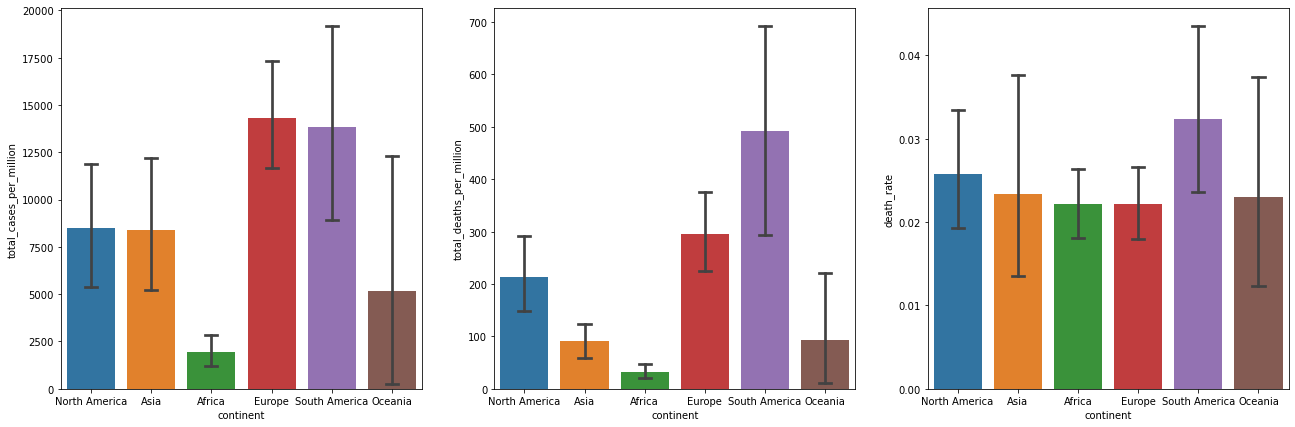

In [16]:
fig, axs = plt.subplots(ncols=3)
fig.set_figheight(7)
fig.set_figwidth(22)
chars = ['total_cases_per_million', 'total_deaths_per_million','death_rate']

for i in range(3):
    sns.barplot(x="continent", y=chars[i], data=df2, ax =axs[i], capsize=.2)

In [17]:
for i in range(len(chars)):
    for j in range(len(chars)):
        if j>i:
            x = np.copy(df2[chars[i]].to_numpy())
            y = np.copy(df2[chars[j]].to_numpy())
            for k in range(x.size):
                if np.isnan(x[k]) or np.isnan(y[k]):
                    x[k] = np.nan
                    y[k] = np.nan
            x = x[~np.isnan(x)]
            y = y[~np.isnan(y)]
            print(chars[i]+" - "+chars[j]+"\n"+"t-statistic: "+ str(sp.stats.ttest_ind(x,y)[0])+" p-value: "+str(sp.stats.ttest_ind(x,y)[1]))
            print("----------------------")

total_cases_per_million - total_deaths_per_million
t-statistic: 11.296380696497808 p-value: 1.039217145558624e-25
----------------------
total_cases_per_million - death_rate
t-statistic: 11.52006415504519 p-value: 1.5310482360290936e-26
----------------------
total_deaths_per_million - death_rate
t-statistic: 10.104577040440862 p-value: 2.028080003167258e-21
----------------------


<font size=3>
Όπως παρατηρούμε οι τιμές των p-value που παίρνουμε από το t-test είναι όλες κατά πολύ μικρότερες από το 0.05. Αυτό σημαίνει ότι 
απορρίπτεται το null hypothesis των ίσων μέσων όρων και άρα οι διαφορές μας είναι στατιστικά σημαντικές.
</font>

## C.

## Απεικόνιση της πανδημίας παγκοσμίως

In [18]:
#Create new dateframe and keep entries from January 2020 and after
df3 = df[['continent','location','date','new_cases','new_deaths']]
df3['date']= pd.to_datetime(df3['date'])
df3 = df3.loc[df3['date'] > '20-01-01']
#Keep only rows where location is 'World' because we want worldwide new cases and deaths
df3 = df3.loc[df3['location']=='World']
#Calculate the death rate
df3['death_rate'] = df3['new_deaths']/df3['new_cases']
df3['date'] = df3['date'].dt.strftime('%y-%m')
df3

<ipython-input-18-1beaa329e103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date']= pd.to_datetime(df3['date'])


,continent,location,date,new_cases,new_deaths,death_rate
58893,NaN,World,19-12,27.0,0.0,0.000000
58894,NaN,World,20-01,0.0,0.0,NaN
58895,NaN,World,20-01,0.0,0.0,NaN
58896,NaN,World,20-01,17.0,0.0,0.000000
58897,NaN,World,20-01,0.0,0.0,NaN
...,...,...,...,...,...,...
59221,NaN,World,20-11,518752.0,7087.0,0.013662
59222,NaN,World,20-11,532907.0,8976.0,0.016843
59223,NaN,World,20-11,561749.0,12169.0,0.021663
59224,NaN,World,20-11,646940.0,12552.0,0.019402


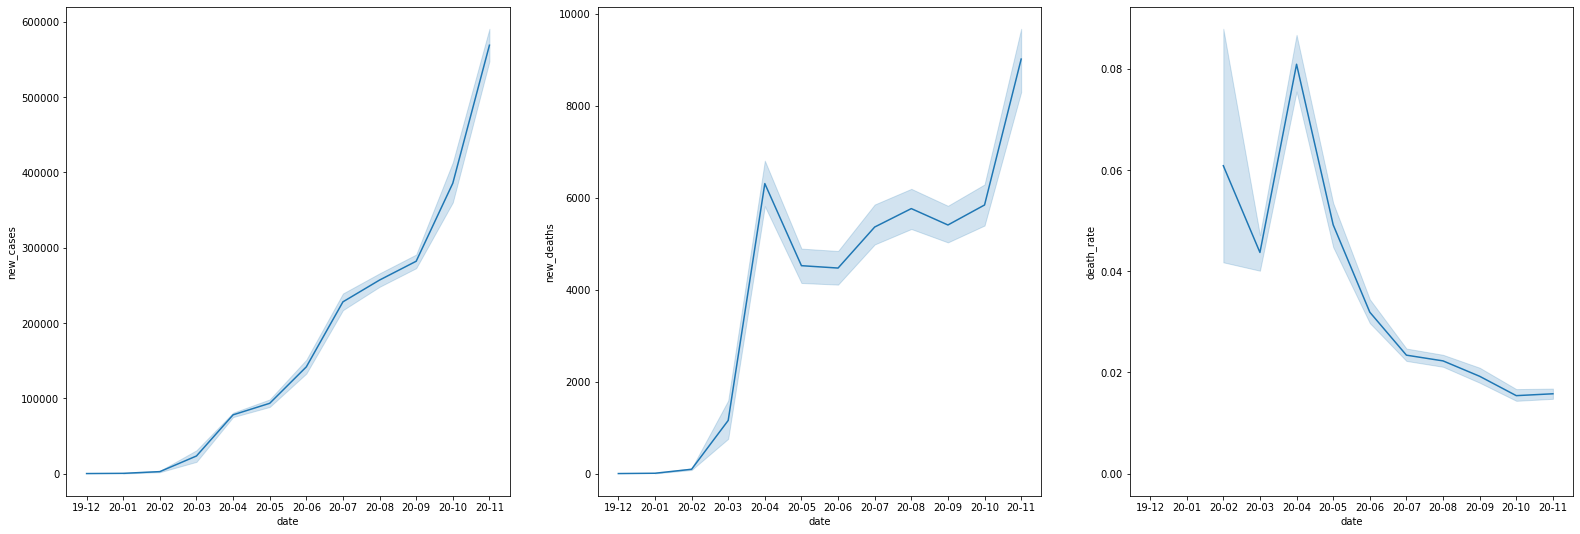

In [19]:
fig, axs = plt.subplots(ncols=3)
fig.set_figheight(9)
fig.set_figwidth(27)
l = ['new_cases','new_deaths','death_rate']
for i in range(len(l)):
    sns.lineplot(data=df3,x='date',y=l[i],ax=axs[i])

<font size=3>
Τα παραπάνω γραφήματα μας δείχνουν (από αριστερά προς τα δεξιά) ανά μήνα τα νέα κρούσαμτα, τους νέους θανάτους και το πώς κυμαίνεται ο ρυθμός θανάτων ως μέσο ημερίσιο όρο . Από την πρώτη γραφική παράσταση μπορούμε να δούμε πως τα νέα μέσα ημερίσια κροούσματα κάθε μήνα ακολοθούν εμφανώς εκθετική αύξηση.
</font>

## Απεικόνιση της πανδημίας ανά ήπειρο

In [20]:
df4 = df[['continent','date','new_cases','new_deaths']]
df4['date']= pd.to_datetime(df4['date'])
df4 = df4.loc[df4['date'] > '20-01-01']
df4 = df4[df4['continent'].notna()]
df4['death_rate'] = df4['new_deaths']/df4['new_cases']
df4['date'] = df4['date'].dt.strftime('%y-%m')
#We remove death rates that have 'inf' values
df4.replace([np.inf, -np.inf], np.nan, inplace=True) 
df4

<ipython-input-20-8a401be6c8b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['date']= pd.to_datetime(df4['date'])


,continent,date,new_cases,new_deaths,death_rate
0,North America,20-03,2.0,0.0,0.000000
1,North America,20-03,NaN,NaN,NaN
2,North America,20-03,2.0,0.0,0.000000
3,North America,20-03,NaN,NaN,NaN
4,North America,20-03,NaN,NaN,NaN
...,...,...,...,...,...
58888,Africa,20-11,48.0,3.0,0.062500
58889,Africa,20-11,88.0,5.0,0.056818
58890,Africa,20-11,90.0,1.0,0.011111
58891,Africa,20-11,110.0,0.0,0.000000


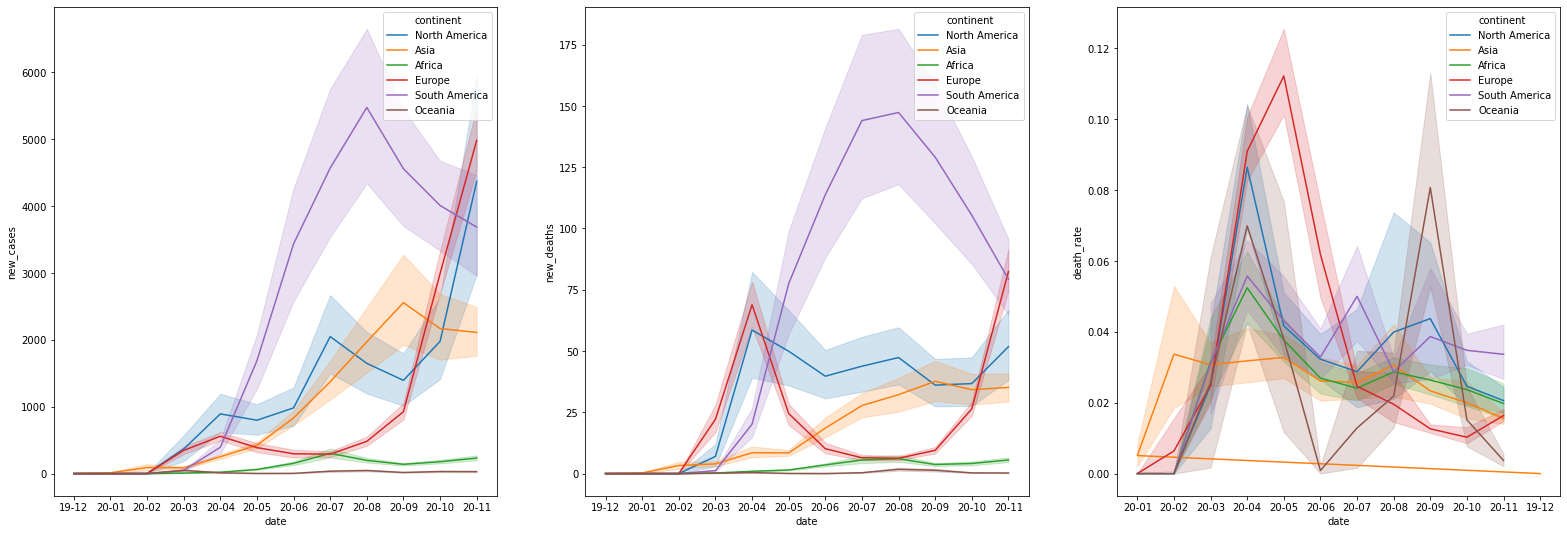

In [21]:
fig, axs = plt.subplots(ncols=3)
fig.set_figheight(9)
fig.set_figwidth(27)
l = ['new_cases','new_deaths','death_rate']
for i in range(len(l)):
    sns.lineplot(data=df4,x='date',y=l[i],ax=axs[i],hue='continent')

<font size=3>
Ως προς τα νέα μέσα ημερίσια κρούσματα ανά μήνα παρατηρούμε ότι η Βόρεια Αμερική, η Ευρώπη, η Ασία και η Νότια Αμερική έχουν εκθετική αύξηση κρουσμάτων τουλάχιστον μέχρι τους μήνες του Αυγούστου και του Σεπτεμβρίου. Αντιθέτως βλέπουμε μια πολύ ομαλή κατάσταση στην Αφρική και στην Ωκεανία. Η Νότια Αμερική και η Ασία φαίνεται πως παρά την εκθετική αύξηση μέχρι πριν λίγο καιρό έχουν μειώσει τώρα την εξάπλωση του ιού. Στο γράφημα με τους νέους μέσους ημερίσιους θανάτους ανά μήνα βλέπουμε πως η Ευρώπη τους τελευταίους μήνες βρίσκεται σε μια ραγδαία αύξηση (μετά τον μήνα Σεπτέρμβριο) κάτι που συμβαδίζει και με την ραγδαία εξάπλωση των τελευταίων μηνών στην γηραιά ήπειρο. Παρόμοια, αλλά με μικρότερους ρυθμούς, παρατηρούμε το ίδιο και στην Βόρεια Αμερική. Στις υπόλοιπες ηπείρους οι θάνατοι έχουν πέσει ή είναι σταθεροί σε σχέση με τους προηγούμενους μήνες.
</font>

## D.

In [22]:
#Read date from csv and xlsx
df_uscovid = pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv')
df_elections = pd.read_excel('state-voting.xlsx')
#Only keep certain characteristics
df_uscovid = df_uscovid[['State/Territory','Total Cases', 'Case Rate per 100000','Total Deaths','Death Rate per 100000']]
#Rename column to State
df_uscovid = df_uscovid.rename(columns={'State/Territory':'State'})
#Remove all non States
df_uscovid.drop(df_uscovid[~df_uscovid['State'].isin(df_elections['State'])].index, inplace=True)
#Add New York entry manually after having calculated necessary values by hand
df_uscovid.drop(df_uscovid.loc[df_uscovid['State']=='New York'].index,inplace=True)
ny_entry = {'State':'New York', 'Total Cases':642047, 'Case Rate per 100000':3300, 'Total Deaths':34179,'Death Rate per 100000':175}
df_uscovid = df_uscovid.append(ny_entry, ignore_index = True) 
df_uscovid.reset_index(drop=True)

,State,Total Cases,Case Rate per 100000,Total Deaths,Death Rate per 100000
0,Alaska,30204,4096,120,16
1,Alabama,244993,5012,3572,73
2,Arkansas,155026,5144,2449,81
3,Arizona,322774,4501,6624,92
4,California,1183320,2991,19089,48
5,Colorado,225283,3955,2983,52
6,Connecticut,112581,3151,4961,138
7,District of Columbia,21038,2995,678,96
8,Delaware,35251,3645,770,79
9,Florida,969813,4553,18442,86


<font size=3>
Θα εξετάσουμε την στατιστική σημασία μεταξύ εκλογών και πανδημίας covid χρησιμοποιόντας πρώτα τους θανάτους ανά 100k και έπειτα τα κρούσματα ανά 100k ανά πολιτεία. Θα χρησιμοποιήσουμε σαν μετρική το t-test και θα μετατρέψουμε τα αποτελέσματα των εκλογών από κατηγορικά σε δυαδικά, αφού κάθε πολιτεία ψήφισε είτε Ρεπουμπλικάνους είτε Δημοκρατικούς.
</font>

In [23]:
election_results = np.copy(df_elections['Vote'].replace({'R':0,'D':1}).to_numpy())
deaths = np.copy(df_uscovid['Death Rate per 100000'].to_numpy())
sp.stats.ttest_ind(election_results,deaths)

Ttest_indResult(statistic=-12.854015294791031, pvalue=6.611526703384098e-23)

<font size=3>
Όπως παρατηρούμε παραπάνω το p-value είναι εξαιρετικά μικρό, κάτι που μας δείχνει ότι η διαφορά μεταξύ εκλογών και θανάτων ανά 100k ανά πολιτεία έχει στατιστική σημασία.
</font>

In [24]:
cases = np.copy(df_uscovid['Case Rate per 100000'].to_numpy())
sp.stats.ttest_ind(election_results,cases)

Ttest_indResult(statistic=-16.802279067884207, pvalue=6.9830541091576785e-31)

<font size=3>
Και η διαφορά μεταξύ κρουσμάτων covid ανά 100k και αποτελεσμάτων εκλογών δείχνει στατιστική σημασία. Επομένως μπορούμε να καταλήξουμε με μεγάλη ασφάλεια στο ότι υπάρχει στατιστική σημασία μεταξύ των εκλογών και της πανδημίας covid στην εκάστοτε πολιτεία.
</font>